### Translate Performance into Clinical Utility Exercise
The output of the last layer of your CNN will output a probability that an image belongs to a given class. The last step in assessing the performance of your model is choosing the appropriate cut-off threshold for this probability value such that the model behaves in a way that is clinically optimal. Changing this threshold will change the true positive, false positive, false negative, and true negative rates, which we learned about in Lesson 1. This will, in turn, change the precision and recall of our model. Precision and recall are important concepts in clinical testing, and usually, one is optimized at the expense of another.

In this exercise, you'll be given a dataframe with ground truth labels as well as probabilities output by an algorithm that you developed to classify images as having a malignant tumor or not. Your job is to generate a Precision-Recall curve as well as an optional ROC AUC curve with the data in this dataframe.

Once you create these curves, choose two different thresholds: one that favors precision and one that favors recall. Use these thresholds to calculate two separate F1 scores. Then, also calculate the accuracy of your algorithm using these two different thresholds and think about why accuracy is or is not a good choice of performance statistic for your data.

In [1]:

%matplotlib inline
import numpy as np       # linear algebra
import pandas as pd      # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, plot_precision_recall_curve,f1_score, confusion_matrix


# Import any other libraries you may need such as
# average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix

In [2]:
performances = pd.read_csv('performances.csv')

In [3]:
performances.head()

,ground_truth,probability
0,1,0.99
1,1,0.98
2,1,0.97
3,1,0.96
4,1,0.95


### Exercise

In [4]:
# function to plot the roc_curve. You can utilize roc_curve and auc imported above
def plot_roc_curve(ground_truth, probability):
    ## YOUR CODE HERE
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    fpr, tpr, thresholds = roc_curve(ground_truth, probability)
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('Pneumonia', auc(fpr, tpr)))
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')
    
# function to plot the precision_recall_curve. You can utilizat precision_recall_curve imported above
def plot_precision_recall_curve(ground_truth, probability):
    ## YOUR CODE HERE
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(ground_truth, probability)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)'  %
              ('Pneumonia', 
               average_precision_score(ground_truth, probability)))
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')

# function to calculate the F1 score
def calc_f1(prec,recall):
    return 2*(prec*recall)/(prec+recall)

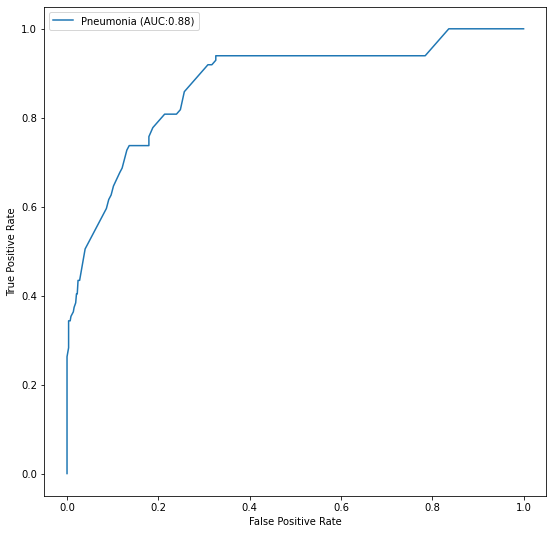

In [5]:
plot_roc_curve(performances['ground_truth'],performances['probability'])

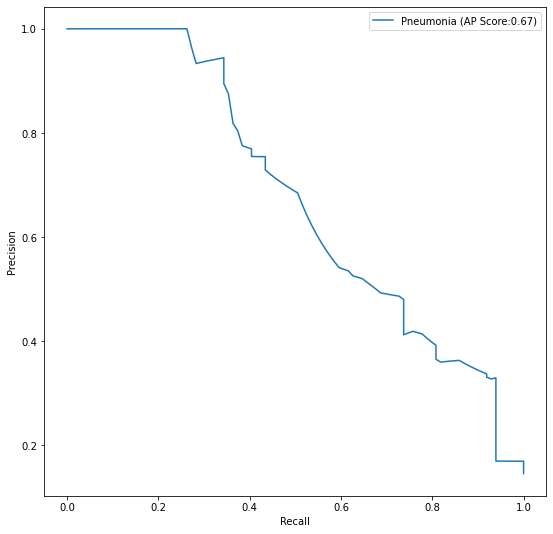

In [6]:
plot_precision_recall_curve(performances['ground_truth'],performances['probability'])

### Calculate F1 Score
Calculate F1 score for two different scenarios here, 
1. Choose a threshold that favors precision, 
2. Choose a threshold that favors recall

Print the precision, recall, threshold, and F1 score for each scenario. 

In [7]:
### YOUR CODE HERE
precision, recall, thresholds = precision_recall_curve(performances['ground_truth'],performances['probability'])

In [8]:
# Look at the threshold where precision is 0.8
precision_value = 0.8
idx = (np.abs(precision - precision_value)).argmin() 
print('Precision is: '+ str(precision[idx]))
print('Recall is: '+ str(recall[idx]))
print('Threshold is: '+ str(thresholds[idx]))
print('F1 Score is: ' + str(calc_f1(precision[idx],recall[idx])))

Precision is: 0.8043478260869565
Recall is: 0.37373737373737376
Threshold is: 0.79
F1 Score is: 0.5103448275862069


In [9]:
# Look at the threshold where recall is 0.8
recall_value = 0.8
idx = (np.abs(recall - recall_value)).argmin() 
print('Precision is: '+ str(precision[idx]))
print('Recall is: '+ str(recall[idx]))
print('Threshold is: '+ str(thresholds[idx]))
print('F1 Score is: ' + str(calc_f1(precision[idx],recall[idx])))

Precision is: 0.398989898989899
Recall is: 0.797979797979798
Threshold is: 0.39
F1 Score is: 0.531986531986532


**As we can see, the thresholds are really different for the two cases.**

--- 

### Examine the _accuracy_ under the two scenarios
Now look at what the _accuracy_ of our model would be using those two threshold values. **Hint, you can add a new column with value 0 or 1 as predictions based on the threshold you choose, then you can calculate accuracy using ground truth and the prediction you just made.**

Print the _accuracy_ in both the cases, and think about why accuracy really isn't a great performance statistic when evaluating and interpreting the utility of our models. 

In [10]:
probs = performances['probability']
t1 = (probs > 0.79)
t2 = (probs > 0.39)

In [11]:
### YOUR CODE HERE
t1 = t1.replace(True,1).replace(False,0)
t2 = t2.replace(True,1).replace(False,0)

In [12]:
compare_t1 = (t1 == performances['ground_truth'])
compare_t2 = (t2 == performances['ground_truth'])

In [13]:
print('Accuracy at threshold 1: ' + str(len(compare_t1[compare_t1])/len(performances)))

Accuracy at threshold 1: 0.8954344624447718


In [14]:
print('Accuracy at threshold 2: ' + str(len(compare_t2[compare_t2])/len(performances)))

Accuracy at threshold 2: 0.801178203240059
